In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv


In [2]:
# importing the data set as csv file from the directory
training = pd.read_csv('../input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv')


In [3]:
# splitting the features and the labels
X_train = training.drop('label', axis=1)
y_train = training['label']

In [4]:
# Displaying the shape of the images
training.shape

(27455, 785)

In [5]:
# using the to_categorical function to one hot encode the labels
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 25)

In [6]:
# reshaping the features to make them suitable for training
X_train = X_train.values.reshape(-1, 28, 28, 1)

In [7]:
# rescaling the features 
X_train = X_train / 255.0

In [8]:
import keras
from keras.preprocessing.image import ImageDataGenerator

training_gen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False # randomly flip images
) 

In [9]:
# Splitting the training data into training and validation data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True)

In [10]:
training_gen.fit(X_train)

In [11]:
# Importing the needed modules.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import RMSprop

In [12]:
# Building the model
model = Sequential([
    Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same', activation ='relu', input_shape = (28,28,1)), 
    MaxPool2D((2, 2)),
    
    BatchNormalization(),
    
    Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation ='relu', input_shape = (28,28,1)), 
    MaxPool2D((2, 2)),
    
    Dropout(0.3),
    
    Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation ='relu', input_shape = (28,28,1)), 
    MaxPool2D((2, 2)),
    
    BatchNormalization(),

    Conv2D(filters = 128, kernel_size = (3,3), padding = 'Same', activation ='relu', input_shape = (28,28,1)), 
    MaxPool2D((2, 2)),
    
    
    Flatten(),
    
    Dropout(0.3),
    
    Dense(784, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dense(25, activation='softmax')
])

2022-07-28 04:54:47.261281: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-28 04:54:47.367748: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-28 04:54:47.368626: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-28 04:54:47.370386: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [13]:
epochs = 30 # Turn epochs to 30 to get 0.999 accuracy
batch_size = 64

# Compile the model
model.compile(optimizer = 'RMSprop' , loss = "categorical_crossentropy", metrics=["accuracy"])
 
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 3, verbose=1,factor=0.5, min_lr=0.00001)

In [14]:
# Fit the model
history = model.fit_generator(
    training_gen.flow(X_train, y_train, batch_size=batch_size),
    epochs = epochs, 
    validation_data = (X_val, y_val),
    verbose = 1,
    callbacks=[learning_rate_reduction]
)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-07-28 04:54:49.997384: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-07-28 04:54:51.967018: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


344/344 [==============================] - 15s 22ms/step - loss: 2.0384 - accuracy: 0.3302 - val_loss: 5.0845 - val_accuracy: 0.0820
Epoch 2/30
344/344 [==============================] - 7s 20ms/step - loss: 0.9153 - accuracy: 0.6714 - val_loss: 0.5692 - val_accuracy: 0.7922
Epoch 3/30
344/344 [==============================] - 7s 21ms/step - loss: 0.6241 - accuracy: 0.7832 - val_loss: 0.2301 - val_accuracy: 0.9157
Epoch 4/30
344/344 [==============================] - 7s 20ms/step - loss: 0.4712 - accuracy: 0.8425 - val_loss: 0.1366 - val_accuracy: 0.9441
Epoch 5/30
344/344 [==============================] - 7s 20ms/step - loss: 0.3707 - accuracy: 0.8803 - val_loss: 0.3381 - val_accuracy: 0.8916
Epoch 6/30
344/344 [==============================] - 7s 21ms/step - loss: 0.3150 - accuracy: 0.9009 - val_loss: 0.4400 - val_accuracy: 0.8723
Epoch 7/30
344/344 [==============================] - 7s 21ms/step - loss: 0.2801 - accuracy: 0.9166 - val_loss: 0.1190 - val_accuracy: 0.9616
Epoch 8/3

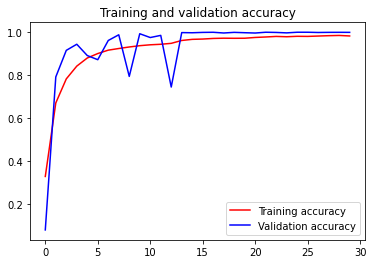

<Figure size 432x288 with 0 Axes>

In [15]:
# Plotting the accuracy on the training and the validation sets to see if there is a sign of overfitting
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [16]:
# Preparing the test data to evaluate how good is our model.

test = pd.read_csv("../input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv")
X_test = test.drop('label', axis=1)
y_test = test['label']
X_test = X_test.values.reshape(-1, 28, 28, 1)
X_test = X_test / 255.0
y_test = to_categorical(y_test, num_classes=25)

In [17]:
# Evaluating the Accuracy on the test data
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

225/225 [==============================] - 1s 3ms/step - loss: 0.0013 - accuracy: 0.9996
Accuracy of the model is -  99.95816946029663 %
